## 데이터 생성

In [1]:
import numpy as np
np.random.seed(42) # 다른 컴퓨터에서도 동일한 난수의 발생 순서를 보장

In [2]:
## 정답 데이터 생성
X=np.random.uniform(size=50)*5 #0~5 사이의 난수를 
y=0.65*X**3-4*X**2+3*X+3+np.random.normal(scale=0.6,size=50)

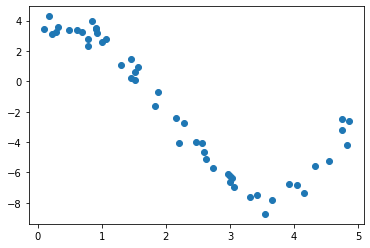

In [3]:
# 정답 데이터를 산점도로 출력
import matplotlib.pyplot as plt
plt.scatter(X,y)

## numpy 이용 직접 쪼개기

In [4]:
# create an index array and shuffle it
idx = np.arange(len(X))
np.random.shuffle(idx)

# shuffle the arrays with the same shuffled index
X,y = X[idx],y[idx]

# 데이터 쪼개기 
# 7:3
train_size = int(len(X)*0.7)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [5]:
# 선형회귀 학습
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [6]:
# 모델 검증
from sklearn.metrics import mean_squared_error
y_pred=reg.predict(X_test.reshape(-1,1))
mean_squared_error(y_test,y_pred)

3.057470173897163

## sklearn을 이용한 train_test_split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35,)
(15,)
(35,)
(15,)


In [9]:
reg.fit(X_train.reshape(-1,1),y_train)
y_pred=reg.predict(X_test.reshape(-1,1))

In [10]:
mean_squared_error(y_test,y_pred)

7.7291748630554356

## 차수를 변경해가며 검증

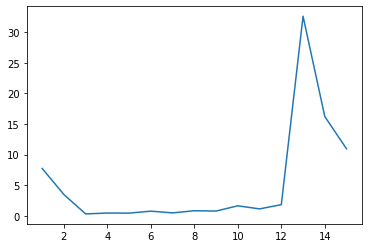

In [11]:
from sklearn.preprocessing import PolynomialFeatures
mse=[]
degrees =range(1,16) 
for i in degrees:
    poly=PolynomialFeatures(degree=i,include_bias=False)    
    reg.fit(poly.fit_transform(X_train.reshape(-1,1)),y_train)
    y_pred=reg.predict(poly.fit_transform(X_test.reshape(-1,1)))
    mse.append(mean_squared_error(y_test,y_pred))
plt.plot(degrees, mse)
    

## Train-Test Split의 한계점

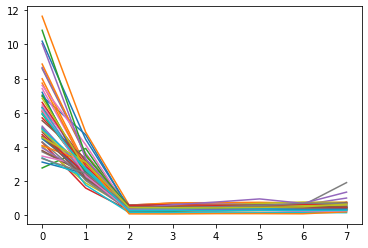

In [17]:
from sklearn.preprocessing import PolynomialFeatures
for s in range(50):
    mse=[]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True)
    for i in range(1,9):
        poly=PolynomialFeatures(degree=i,include_bias=False)    
        reg.fit(poly.fit_transform(X_train.reshape(-1,1)),y_train)
        y_pred=reg.predict(poly.fit_transform(X_test.reshape(-1,1)))
        mse.append(mean_squared_error(y_test,y_pred))
    plt.plot(mse)
    

data